# Notebook 6: Expectation-maximization (EM) algorithm
***

In this notebook we'll work through one iteration (maybe more!) of the EM algorithm to get a feel for how it works. We will also check out the key difference between soft-clustering methods like GMMs and hard-clustering methods like K-means: that hard-clustering approaches offer a binary (0 or 1) classification for each data point as a member of a particular cluster or not, whereas soft-clustering methods are "fuzzier" in the sense that they assign a *probability between 0 and 1* that a given data point is part of a particular cluster. So let's get to it!

We'll need some nice packages for this notebook, so let's load them.

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

<br>

### Exercise 1:  We're allowed back in Chuck E. Cheese's... for now.

Let's load up the Chuck E. Cheese's age data from the lecture slides.

In [2]:
dfA = pd.read_csv("../data/ages.csv", header=None)
dfA.head()

,0
0,9.41
1,4.43
2,12.30
3,7.06
4,5.84


As seen in the last lecture slide, let's start with the following and do one iteration of the EM algorithm step by step.

In [3]:
mu1, mu2 = 10, 38
var1, var2 = 7, 20
pi = 0.50

#if we wanted to initialize, we might:
# pick two indices at random
# those two indices have locations; call those mu1, mu2.
# the overall data set has np.var(dfA[0]); call BOTH var1, var2 equal to that value.
#initialize each cluster as a probability(cluster)=.5 
#... enter algorithm

To begin, let's have a look at the mixture model using those initial parameter estimates.

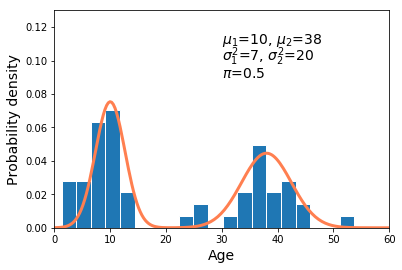

In [4]:
# Evaluate and plot the mixture model at a grid of 200 evenly spaced ages ranging from 0 to 60 years old
xgrid = np.linspace(0,60,200)
# evaluate the first component
f1 = stats.norm.pdf(xgrid, loc=mu1, scale=np.sqrt(var1))
# evaluate the second component
f2 = stats.norm.pdf(xgrid, loc=mu2, scale=np.sqrt(var2))
# mix them together
fx = (1-pi)*f1+pi*f2

# make a plot
plt.hist(dfA[0], bins=20, edgecolor="white", density=True)
#plt.plot(xgrid, f1, color="coral", linewidth=3)
#plt.plot(xgrid, f2, color="purple", linewidth=3)
plt.plot(xgrid, fx, color="coral", linewidth=3)
plt.text(30, 0.11, "$\mu_1$={}, $\mu_2$={}".format(mu1,mu2), fontsize=14)
plt.text(30, 0.10, "$\sigma_1^2$={}, $\sigma_2^2$={}".format(var1,var2), fontsize=14)
plt.text(30, 0.09, "$\pi$={}".format(pi), fontsize=14)
plt.xlim([0,60])
plt.ylim([0,0.13])
plt.xlabel("Age", fontsize=14)
plt.ylabel("Probability density", fontsize=14);

Looks familiar, no?

We start a single iteration of the EM algorithm in the **Expectation** step (2a from the slides), by computing $\hat{p}_{m,i} = Pr(C=m \mid x_i)$ for each data point $x_i$. This is the probability of component model $m$, given that data point:
$$\hat{p}_{m,i} = Pr(C=m \mid x_i) = \alpha Pr(x_i \mid C=m) Pr(C=m) = \alpha \phi(x_i \mid \hat{\mu}_m, \hat{\Sigma}_m) \hat{w}_m$$

The first part of the right hand side, $\phi(x_i \mid \hat{\mu}_m, \hat{\Sigma}_m)$, we can estimate for each data point using our current estimates for the component means and variances as:

In [8]:
# dfA[0] # all the data


In [9]:
p_data_given_class1 = stats.norm.pdf(dfA[0], loc=mu1, scale=np.sqrt(var1))
p_data_given_class2 = stats.norm.pdf(dfA[0], loc=mu2, scale=np.sqrt(var2))

And the probability for each model, $\hat{w}_m$, we can get from the current estimate of the mixing parameter $\pi$:

In [10]:
p_class1 = 1-pi
p_class2 = pi

This gives for the full *unnormalized* right-hand side:

In [11]:
p_class1_given_data = p_data_given_class1*p_class1
p_class2_given_data = p_data_given_class2*p_class2

In [14]:
#goal is to compare theses; make them probability ratios/
print(p_class1_given_data[0], p_class2_given_data[0])
print(dfA[0][0])

#we're pretty sure a 9 year old is coming from the left-hand "child" mixture

0.07354152443399424 5.952323647978307e-11
9.41


Now, to get formal probabilities, we must make sure that they sum to one. This is what that $\alpha$ term is accomplishing above, which we haven't accounted for yet. So we normalize the probabilities by dividing each term by their sum:

In [15]:
summ = p_class1_given_data + p_class2_given_data
p_class1_given_data = p_class1_given_data / summ
p_class2_given_data = p_class2_given_data / summ

In [16]:
print(p_class1_given_data[0], p_class2_given_data[0])

0.9999999991906173 8.093826839968474e-10


Check below that the sum of *both* `p_class1_given_data` and `p_class2_given_data` is the number of data points (think of them as "votes" for the component models -- we have 54 data points, so how many votes should we have total?).

In [19]:
print(np.sum(p_class1_given_data))
print(np.sum(p_class2_given_data))
print(len(dfA))

30.01016721379784
23.989832786202165
54


## We have concluded "Step 1: loop over points"
(we updated the P(cluster) for each and every point)

Following along with the lecture slides, we are now ready for the **Maximization** step, wherein we update our estimates of the number of data points from each component ($\hat{n}_m$) and the means and variances for each component, to maximize the likelihood function. 

First, we need to update the model weights $\hat{w}_m = \dfrac{\sum_i \hat{p}_{mi}}{N}$, where $N=54$ is the number of data points. Note that we only really need to update our estimate `pi`, which is $\hat{w}_2$.

Compute the effective number of "votes" for each component, which is the numerator $\hat{n}_m = \sum_i \hat{p}_{mi}$.

In [21]:
n_class1 = np.sum(p_class1_given_data) # TODO
n_class2 = np.sum(p_class2_given_data) # TODO

Now we can divide each of those by the total number of data points to update `pi` ($\hat{w}_2$):

In [ ]:
pi = n_class2/len(dfA) # TODO -- fill in the appropriate computation

# to put into the more general variable names
p_class1 = 1-pi
p_class2 = pi

# note that these were originally 0.5 for each model and now we have updated them
print(p_class1, p_class2)

Now we are at the "Second" step of 2b in the lecture slides: time to update the means for each component, in light of the updated component weights and probabilities $\hat{p}_{mi}$:
$$\hat{\mu}_m = \dfrac{1}{\hat{n}_m} \sum_i \hat{p}_{mi} x_i$$

Compare this to a regular mean:


$$\bar{X}= \frac{1}{n} \cdot \sum_{i=1}^n x_i$$

In [23]:
mu1 = (1/n_class1)*np.sum(dfA[0]*p_class1_given_data) # TODO
mu2 = (1/n_class2)*np.sum(dfA[0]*p_class2_given_data) # TODO
print(mu1, mu2)

8.029897318051349 37.40757373231029


We complete the maximization (M) step of this first iteration of the EM algorithm by updating our estimates of the variances. The equation from the textbook and lecture slides simplifies in the 1-dimensional case as:
$$\hat{\sigma}^2_m = \dfrac{1}{\hat{n}_m} \sum_i \hat{p}_{mi} (x_i-\hat{\mu}_m)^2$$

$$s^2= \frac{1}{n-1} \cdot \sum_{i=1}^n (x_i-\bar{X})^2$$
two changes: $n -1 \to n$, and also probability weight

In [24]:
var1 = (1/n_class1)*np.sum(((dfA[0]-mu1)**2)*p_class1_given_data) # TODO # TODO
var2 = (1/n_class2)*np.sum(((dfA[0]-mu2)**2)*p_class2_given_data) # TODO # TODO # TODO
# Note that the variances were originally 7 and 20 -- what are they now?
print(var1, var2)

9.292493555740093 41.976337749776675


It's important to consider a key difference between Gaussian mixture models and K-means as methods of clustering: GMMs are *soft* assignment of a data point to a cluster, whereas K-means is *hard* assignment. That is, GMMs assign a probability to each data point that it belongs to a cluster, via the *responsibility* of component $m$, given the current parameter estimates ($\theta$) and the data point $x_i$:
$$\gamma_i(\theta) = Pr(C=m \mid \theta, x_i)$$

Consider an 18-year-old hanging around in Chuck E. Cheese's. What are the responsibilities for each model, given our updated parameter estimates?

In [94]:
resp_18_class1 = 0 # TODO
resp_18_class2 = 0 # TODO

**SOLUTION:** deferred until later! When we do a bunch of iterations and report the many-times updated values since we'll have them

So... that's it! Now we would begin our second iteration of the EM algorithm by repeating the steps above, starting from **Expectation** step, updating $\hat{p}_{mi}$. If you have time, trying implementing this in a loop below. Be sure to give it a stopping condition! An easy way to get things off the ground and prepare for your homework is by simply doing a `for` loop for some small number of iterations.

In [25]:
# SOLUTION:

mu1, mu2 = 10, 38
var1, var2 = 7, 20
pi = 0.50

for _ in range(50):

    # Expectation step:
    #density evaluations
    p_data_given_class1 = stats.norm.pdf(dfA[0], loc=mu1, scale=np.sqrt(var1))
    p_data_given_class2 = stats.norm.pdf(dfA[0], loc=mu2, scale=np.sqrt(var2))
    
    #then also multiply by P(cluster)
    p_class1_given_data = p_data_given_class1*p_class1
    p_class2_given_data = p_data_given_class2*p_class2
    
    #normalize
    summ = p_class1_given_data + p_class2_given_data
    p_class1_given_data = p_class1_given_data / summ
    p_class2_given_data = p_class2_given_data / summ

    # Maximization step:
    #points per cluster, just count
    n_class1 = np.sum(p_class1_given_data)
    n_class2 = np.sum(p_class2_given_data)
    #probability per cluster from points pre cluster
    pi = n_class2/len(dfA)
    p_class1 = 1-pi
    p_class2 = pi
    #update mean, var of each cluster
    mu1 = (1/n_class1)*np.sum(p_class1_given_data*dfA[0])
    mu2 = (1/n_class2)*np.sum(p_class2_given_data*dfA[0])
    var1 = (1/n_class1)*np.sum(p_class1_given_data*((dfA[0]-mu1)**2))
    var2 = (1/n_class2)*np.sum(p_class2_given_data*((dfA[0]-mu2)**2))

print(mu1, var1)
print(mu2, var2)

8.024932234050768 9.227606892699292
37.3987109946346 42.11862748316674


**SOLUTION:**  And as for that weird 18-year-old hanging around, we can use the much-improved values for our parameters to get an estimate:

It appears that the 18-year-old is slightly more likely to be associated with the child component (51.4%) than the adult one (48.6%).

To estimate covariance, we do almost the same calculations...
write the mean as $\hat{\mu}_m = [\hat{\mu}_{m,0},\hat{\mu}_{m,1}]$
variance in the first dimension:
$$\hat{\sigma}^2_{m,0} = \dfrac{1}{\hat{n}_m} \sum_i \hat{p}_{mi} (x_i[0]-\hat{\mu}_{m,0})^2$$
variance in the first dimension:
$$\hat{\sigma}^2_{m,1} = \dfrac{1}{\hat{n}_m} \sum_i \hat{p}_{mi} (x_i[1]-\hat{\mu}_{m,1})^2$$
covariance perfectly mixes these:
$$\hat{\sigma}^2_{m,1} = \dfrac{1}{\hat{n}_m} \sum_i \hat{p}_{mi} (x_i[0]-\hat{\mu}_{m,0})\cdot(x_i[1]-\hat{\mu}_{m,1})$$


In [2]:
# #Brief covariance discussion:
    
# p_data_given_class1 = np.array([stats.multivariate_normal.pdf(x=[X[i],Y[i]], mean=mu1, cov=var1)

# mu1x = (1/n_class1)*np.sum(p_class1_given_data*X)
# mu1y = (1/n_class1)*np.sum(p_class1_given_data*Y)
# mu1=[mu1x, mu1y]
# var1xx = (1/n_class1)*np.sum(p_class1_given_data*((X-mu1x)**2))
# var1yy = (1/n_class1)*np.sum(p_class1_given_data*((Y-mu1y)**2))
# var1xy = (1/n_class1)*np.sum(p_class1_given_data*((X-mu1x)*(Y-mu1y)))
# var1=[[var1xx, var1xy],[var1xy,var1yy]]

